In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame 
from datetime import date
import datetime as DT
import io
from scipy import stats
from sklearn.metrics import accuracy_score
#import featuretools as ft


In [ ]:
# df=pd.read_csv("Train.csv")
# #test=pd.read_csv("Test.csv")
# samplesubmission=pd.read_csv("SampleSubmission.csv")
# #variabledef=pd.read_csv("VariableDefinitions.txt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/giara/jukil/Train.csv')
samplesub = pd.read_csv('/content/drive/My Drive/giara/jukil/SampleSubmission.csv')
print(df.shape, df.columns)
df.head()

(10695, 3) Index(['UID', 'growth_stage', 'label_quality'], dtype='object')


,UID,growth_stage,label_quality
0,nwuCTQKz,4,2
1,NVGUOzWu,1,1
2,1IYVvHwA,1,1
3,8OEdWwmU,1,1
4,oc5iO04j,1,1


In [ ]:
df.head()

,UID,growth_stage,label_quality
0,nwuCTQKz,4,2
1,NVGUOzWu,1,1
2,1IYVvHwA,1,1
3,8OEdWwmU,1,1
4,oc5iO04j,1,1


In [ ]:
df.describe()

,growth_stage,label_quality
count,10695.000000,10695.000000
mean,3.654137,1.267041
std,2.293861,0.442434
min,1.000000,1.000000
25%,1.000000,1.000000
50%,4.000000,1.000000
75%,6.000000,2.000000
max,7.000000,2.000000


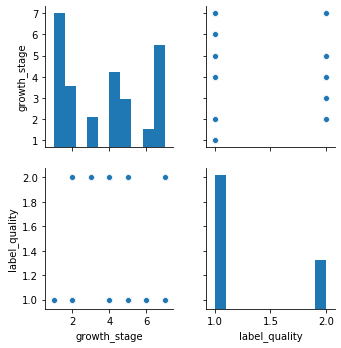

In [ ]:
#taking a general overview df
sns.pairplot(df)

/home/chuka19952/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


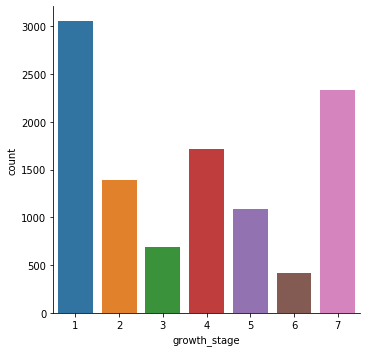

In [ ]:
#We take a closer look 
sns.factorplot('growth_stage',data =df, kind='count')

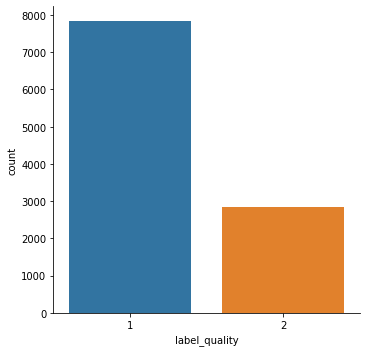

In [ ]:
#We take a closer look 
sns.factorplot('label_quality',data =df, kind='count')

In [ ]:
df.shape, samplesubmission.shape

((10695, 3), (3558, 2))

In [ ]:
df.label_quality = df.label_quality.replace(1, "high")
df.label_quality = df.label_quality.replace(2, "low")

# df.growth_stage = df.growth_stage.replace(1, "crown")
# df.growth_stage = df.growth_stage.replace(2, "earlyV")
# df.growth_stage = df.growth_stage.replace(3, "midV")
# df.growth_stage = df.growth_stage.replace(4, "lateV")
# df.growth_stage = df.growth_stage.replace(5, "floweringV")
# df.growth_stage = df.growth_stage.replace(6, "anthesisV")
# df.growth_stage = df.growth_stage.replace(7, "maturityV")

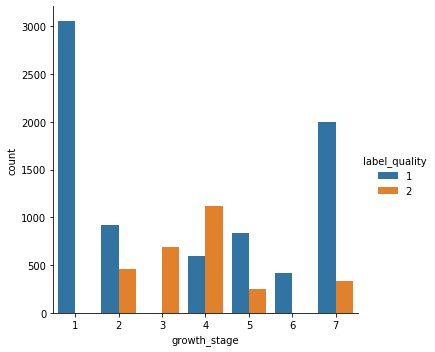

In [ ]:
#We take a closer look 
sns.factorplot('growth_stage',data =df,kind='count', hue='label_quality')

In [ ]:
import os
import shutil

In [ ]:
print(os.getcwd())  #obtains and tells you the current path you're iterating on ...cwd means current working
                    #directory

/home/chuka19952/Documents/Competitions/zindi/CGIARWGSC


In [ ]:
# shutil.copy(f, 'dest_folder') #to copy from file to a destination
# os.mkdir(dir)

In [ ]:
#seperating and copying train files to a new folder

dir = "Images"
os.mkdir("train")

for name in os.listdir(dir):
    for t in df['UID']:
        t = t+".jpeg" #matches the filename in the dataframe by including its ".jpeg" extension for later copy iteration below
        if name == t:
            fullname= os.path.join(dir, name)
            shutil.copy(fullname, '/home/chuka19952/Documents/Competitions/zindi/CGIARWGSC/train')
    


In [ ]:
#seperating and copying test files to a new folder
dir = "Images"

os.mkdir("test")
for name in os.listdir(dir):
    for t in samplesubmission['UID']:
        t = t+".jpeg" #matches the filename in the dataframe by including its ".jpeg" extension for later copy iteration below
        if name == t:
            fullname= os.path.join(dir, name)
            shutil.copy(fullname, '/home/chuka19952/Documents/Competitions/zindi/CGIARWGSC/test')

In [ ]:
import os
import random
import shutil
from shutil import copyfile
import pathlib
from matplotlib.image import imread

In [ ]:
#filtering dataframe 
crownv1 = df[(df['growth_stage']== 1)]
earlyv2 = df[(df['growth_stage']== 2)]
midv3 = df[(df['growth_stage']== 3)]
latev4= df[(df['growth_stage']== 4)]
floweringv5= df[(df['growth_stage']== 5)]
anthesisv6 = df[(df['growth_stage']== 6)]
maturityv7 = df[(df['growth_stage']== 7)]

In [ ]:
#first we make a folder to house all the new train data and various classes
os.mkdir("/content/drive/My Drive/giara/traindata")

In [ ]:
# Copying/seperating the crownv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/crownv1/")
for t in crownv1['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/crownv1/')

# Copying/seperating the earlyv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/earlyv2/")
for t in earlyv2['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/earlyv2/')

# Copying/seperating the midv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/midv3/")
for t in midv3['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/midv3/')

# Copying/seperating the latev class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/latev4/")
for t in latev4['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/latev4/')

# Copying/seperating the floweringv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/floweringv5/")
for t in floweringv5['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/floweringv5/')

# Copying/seperating the anthesisv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/anthesisv6/")
for t in anthesisv6['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/anthesisv6/')

# Copying/seperating the maturityv class files to a separate folder
dir = '/content/drive/My Drive/giara/jukil/train/'
os.mkdir("/content/drive/My Drive/giara/traindata/maturityv7/")
for t in maturityv7['UID']:
  t=t+".jpeg"
  fullname= os.path.join(dir, t)
  if os.path.isfile(fullname):
    shutil.copy(fullname, '/content/drive/My Drive/giara/traindata/maturityv7/')

In [ ]:
#Now we create train and validation directories with seperated class folders within

try:

  os.mkdir('/content/drive/My Drive/giara/Data')
  os.mkdir('/content/drive/My Drive/giara/Data/training')
  os.mkdir('/content/drive/My Drive/giara/Data/validation')
  os.mkdir('/content/drive/My Drive/giara/Data/training/crownV_1')
  os.mkdir('/content/drive/My Drive/giara/Data/training/earlyV_2')
  os.mkdir('/content/drive/My Drive/giara/Data/training/midV_3')
  os.mkdir('/content/drive/My Drive/giara/Data/training/lateV_4')
  os.mkdir('/content/drive/My Drive/giara/Data/training/floweringV_5')
  os.mkdir('/content/drive/My Drive/giara/Data/training/anthesisV_6')
  os.mkdir('/content/drive/My Drive/giara/Data/training/maturityV_7')

  
  os.mkdir('/content/drive/My Drive/giara/Data/validation/crownV_1')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/earlyV_2')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/midV_3')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/lateV_4')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/floweringV_5')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/anthesisV_6')
  os.mkdir('/content/drive/My Drive/giara/Data/validation/maturityV_7')

except OSError:
  pass

In [ ]:
#NOW WE CREATE A FUNCTION THAT COPIES AND SEPERATES TRAIN AND VALIDATION FILES ACCORDING TO ASSIGNED RATIO

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):    #Define a function with 4 paramaters/inputs
    files = []      #define an empty list to recieve full paths of the filenames you want to iterate over from the SOURCE
    for filename in os.listdir(SOURCE):     #Define a loop that iterates through the SOURCE folder of your raw/mixedup data
        file = SOURCE + filename            #Here we define the file by its full path and name
        if os.path.getsize(file) > 0:      #Here is a condition that excludes possible redundant files by examining their sizes
            files.append(filename)        #Appends the examined file's filename to the previouly defined empty list if the file is greater than zero 
        else:
            print(filename + " is zero length, so ignoring.")  

    training_length = int(len(files) * SPLIT_SIZE)  #Here we define the no. of files we want for our training set
    valid_length = int(len(files) - training_length) #Here we define the no.of file for validation
    shuffled_set = random.sample(files, len(files))  #Here we shuffle the data so as to kill any bias during seperation to various folders
    training_set = shuffled_set[0:training_length]   #here we are now defining the training set based on the indicies with ref to the training length
    valid_set = shuffled_set[training_length:]       #same for validation

    for filename in training_set:                  #A loop that copies the trainset files from its original SOURCE 
        this_file = SOURCE + filename             #to its new folder as assigned as a full path in the 'TRAINING' 
        destination = TRAINING + filename        #parameter of the general function
        copyfile(this_file, destination)

    for filename in valid_set:             #Same as above for Validation
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
#HERE WE NOW DEFINE EACH DIRECTORY PATH TO BE EVENTUALLY FED INTO THE SPLIT_DATA FUNCTION

#DEFINING EACH CLASS PATH AND TRAIN/VALID PATH TO BE FED INTO THE FUNCTION LATER
crownv1_src = '/content/drive/My Drive/giara/traindata/crownv1/'
crownv1_train= '/content/drive/My Drive/giara/Data/training/crownV_1/'
crownv1_valid= '/content/drive/My Drive/giara/Data/validation/crownV_1/'

earlyv2_src = '/content/drive/My Drive/giara/traindata/earlyv2/'
earlyv2_train= '/content/drive/My Drive/giara/Data/training/earlyV_2/'
earlyv2_valid= '/content/drive/My Drive/giara/Data/validation/earlyV_2/'

midv3_src=  "/content/drive/My Drive/giara/traindata/midv3/"
midv3_train='/content/drive/My Drive/giara/Data/training/midV_3/'
midv3_valid= '/content/drive/My Drive/giara/Data/validation/midV_3/'

latev4_src= '/content/drive/My Drive/giara/traindata/latev4/'
latev4_train = '/content/drive/My Drive/giara/Data/training/lateV_4/'
latev4_valid= '/content/drive/My Drive/giara/Data/validation/lateV_4/'

floweringv5_src= "/content/drive/My Drive/giara/traindata/floweringv5/"
floweringv5_train= '/content/drive/My Drive/giara/Data/training/floweringV_5/'
floweringv5_valid= '/content/drive/My Drive/giara/Data/validation/floweringV_5/'

anthesisv6_src= "/content/drive/My Drive/giara/traindata/anthesisv6/"
anthesisv6_train= '/content/drive/My Drive/giara/Data/training/anthesisV_6/'
anthesisv6_valid= '/content/drive/My Drive/giara/Data/validation/anthesisV_6/'

maturityv7_src= '/content/drive/My Drive/giara/traindata/maturityv7/'
maturityv7_train= '/content/drive/My Drive/giara/Data/training/maturityV_7/'
maturityv7_valid=  '/content/drive/My Drive/giara/Data/validation/maturityV_7/'


split_size=0.85

In [ ]:
#NOW RUNNING THE FUNCTION PROPER

split_data(crownv1_src, crownv1_train, crownv1_valid, split_size)
split_data(earlyv2_src, earlyv2_train, earlyv2_valid, split_size)
split_data(midv3_src, midv3_train, midv3_valid, split_size)
split_data(latev4_src, latev4_train, latev4_valid, split_size)
split_data(floweringv5_src, floweringv5_train, floweringv5_valid, split_size)
split_data(anthesisv6_src, anthesisv6_train, anthesisv6_valid, split_size)
split_data(maturityv7_src, maturityv7_train, maturityv7_valid, split_size)

In [ ]:
#SOME MORE EDA

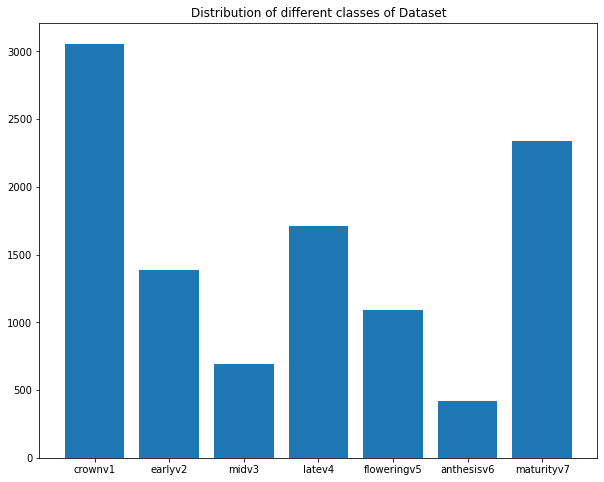

In [ ]:
image_folder = ['crownv1','earlyv2','midv3','latev4','floweringv5','anthesisv6','maturityv7']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/My Drive/giara/traindata/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


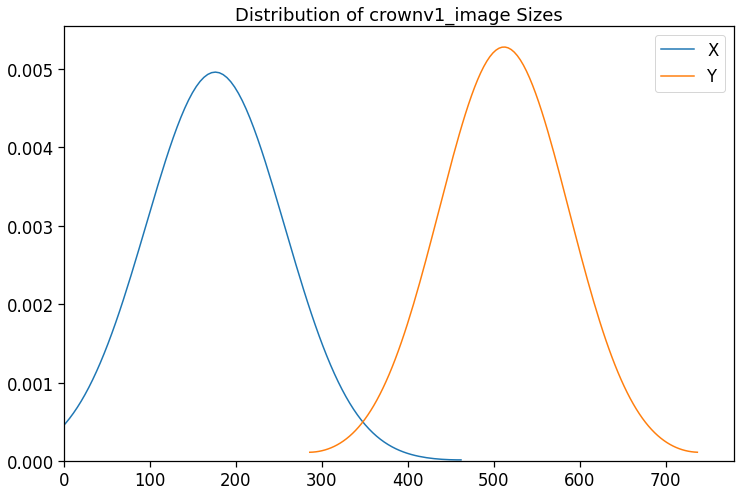

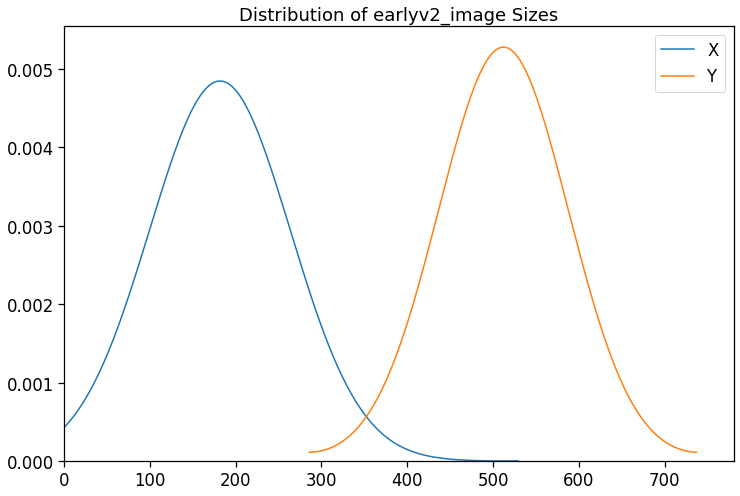

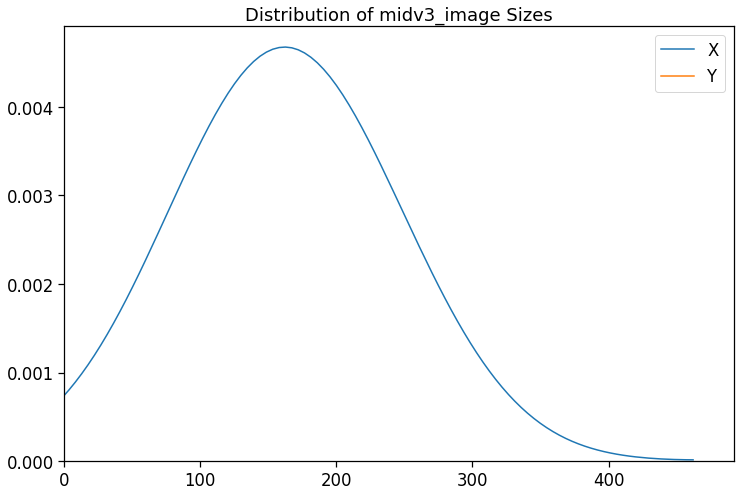

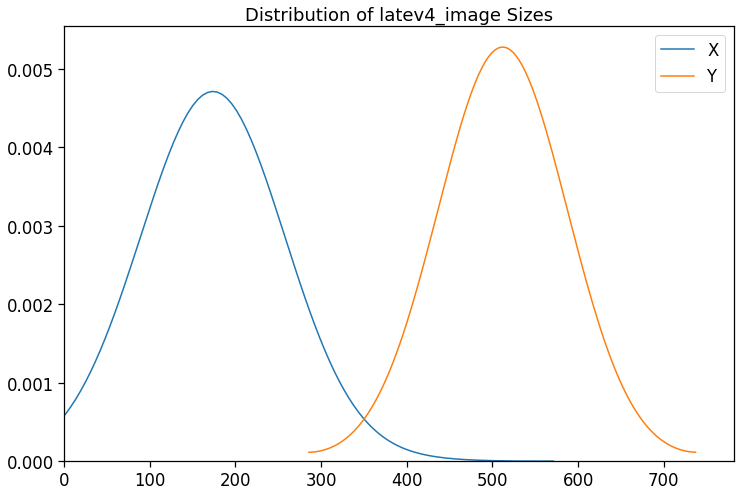

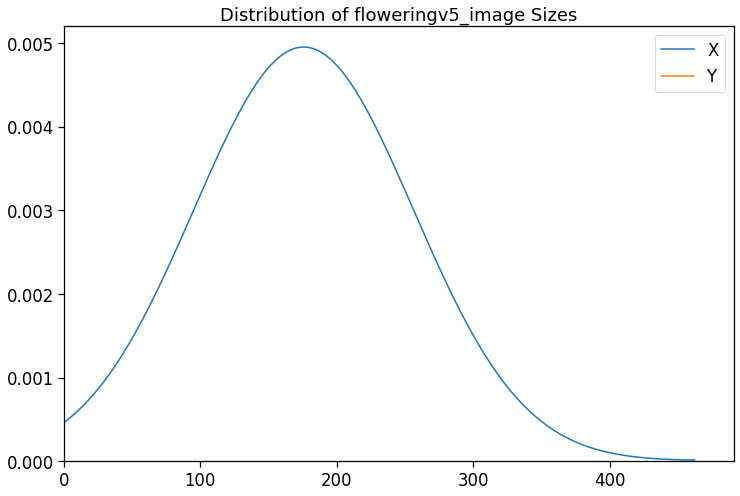

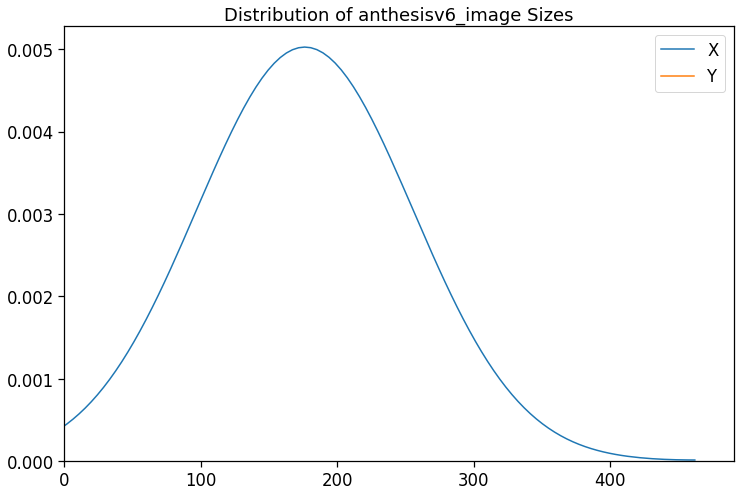

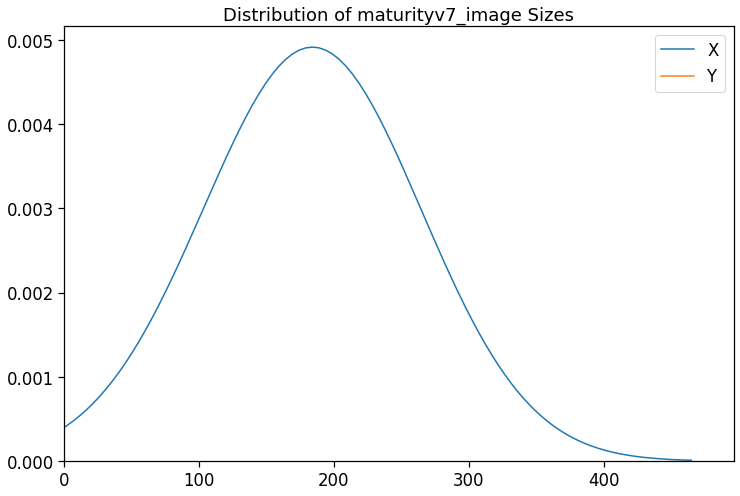

In [ ]:
#plotting kdeplot to see the average sizes of the images and decide what size we can use for our work

image_folder = ['crownv1','earlyv2','midv3','latev4','floweringv5','anthesisv6','maturityv7']

for i in image_folder:
    sample_images = list(pathlib.Path('/content/drive/My Drive/giara/traindata/'+i+'/').rglob('*/'))
    np.random.seed(42)
    rand_imgs = np.random.choice(sample_images, size=10*10)

    shapes = []
    for img in rand_imgs:
        shapes.append(imread(str(img)).shape)
    
    shapes = pd.DataFrame().assign(X=pd.Series(shapes).map(lambda s: s[0]), Y=pd.Series(shapes).map(lambda s: s[1]))
    
    plt.figure(figsize=(12, 8))
    sns.set_context("notebook", font_scale=1.5)
    sns.kdeplot(shapes['X'], bw=75)
    sns.kdeplot(shapes['Y'], bw=75)
    plt.title('Distribution of {}_image Sizes'.format(i))
    ax = plt.gca()
    ax.set_xlim(0, ax.get_xlim()[1])

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart
is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother
distributions by smoothing out the noise. The peaks of a Density Plot help display where values are
concentrated over the interval.  

In this case, we notice that the X-curve(representing length/width) was generally peaking at around 200 on the x-axis while the Y-curve(representing height) was generally peaking around 550 value on the x-axis. Meaning that majority of our images had their sizes concentrated around those values. Hence, for this work, I choose to go with 200*550 dimension/input_shape

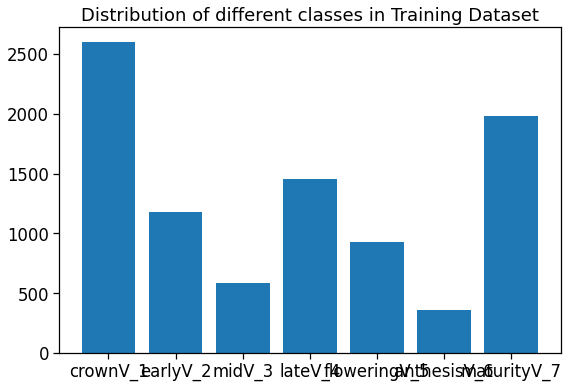

In [ ]:
#CHECKING THE DISTRIBUTION OF CLASSES IN THE SPLITTED TRAINING DATA

image_folder = ['crownV_1', 'earlyV_2', 'midV_3', 'lateV_4', 'floweringV_5', 'anthesisV_6', 'maturityV_7']

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/My Drive/giara/Data/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
#COUNTING THE NUMBER OF IMAGES IN EACH CLASS FOLDER

for i in ['crownV_1', 'earlyV_2', 'midV_3', 'lateV_4', 'floweringV_5', 'anthesisV_6', 'maturityV_7']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/My Drive/giara/Data/training/'+i+'/'))))



Training crownV_1 images are: 2598
Training earlyV_2 images are: 1180
Training midV_3 images are: 585
Training lateV_4 images are: 1455
Training floweringV_5 images are: 928
Training anthesisV_6 images are: 357
Training maturityV_7 images are: 1984


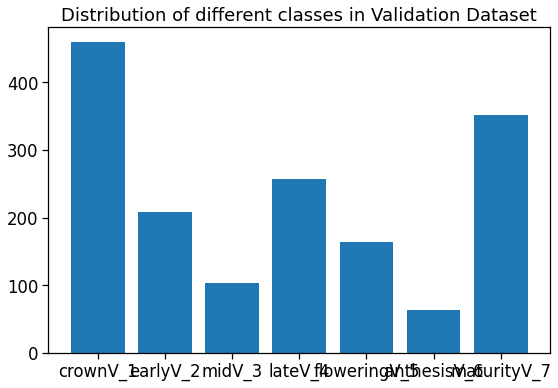

In [ ]:
#CHECKING THE DISTRIBUTION OF CLASSES IN THE SPLITTED VALIDATION DATA

image_folder = ['crownV_1', 'earlyV_2', 'midV_3', 'lateV_4', 'floweringV_5', 'anthesisV_6', 'maturityV_7']

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/My Drive/giara/Data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
#COUNTING THE NUMBER OF IMAGES IN EACH CLASS FOLDER

for i in ['crownV_1', 'earlyV_2', 'midV_3', 'lateV_4', 'floweringV_5', 'anthesisV_6', 'maturityV_7']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/My Drive/giara/Data/validation/'+i+'/'))))



Training crownV_1 images are: 459
Training earlyV_2 images are: 209
Training midV_3 images are: 104
Training lateV_4 images are: 257
Training floweringV_5 images are: 164
Training anthesisV_6 images are: 64
Training maturityV_7 images are: 351
